## Blinkit Grocery Dataset Analysis

#### Business requirements:- To conduct a comprehensive analysis of Blinkit's sales peformance,customer satisfication and inventory distribution to indentify key insights and KPI's in Python.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
blinkit=pd.read_csv("blinkit_data.csv")

In [5]:
blinkit.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [13]:
blinkit.shape

(8523, 12)

In [15]:
blinkit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [17]:
blinkit.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2010.831867,0.066132,12.857645,140.992782,3.965857
std,8.371760,0.051598,4.643456,62.275067,0.605651
min,1998.000000,0.000000,4.555000,31.290000,1.000000
25%,2000.000000,0.026989,8.773750,93.826500,4.000000
50%,2012.000000,0.053931,12.600000,143.012800,4.000000
75%,2017.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


In [19]:
blinkit.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [21]:
blinkit["Item Fat Content"]=blinkit["Item Fat Content"].replace({"LF":"Low Fat",
                                                       "low fat":"Low Fat",
                                                       "reg":"Regular",})

In [23]:
print(blinkit["Item Fat Content"].unique())

['Regular' 'Low Fat']


In [25]:
#KPI's (Key Performance Indicators):-
total_sales=blinkit["Sales"].sum()
avg_sales=blinkit["Sales"].mean()
no_of_items_sold=blinkit["Sales"].count()
avg_ratings=blinkit["Rating"].mean()
#Display:-
print(f"Total Sales:${total_sales:,.0f}")   
print(f"Average Sales:${avg_sales:,.1f}")
print(f"No. of items sold:{no_of_items_sold:,.0f}")
print(f"Average Rating:{avg_ratings:,.1f}")

Total Sales:$1,201,681
Average Sales:$141.0
No. of items sold:8,523
Average Rating:4.0


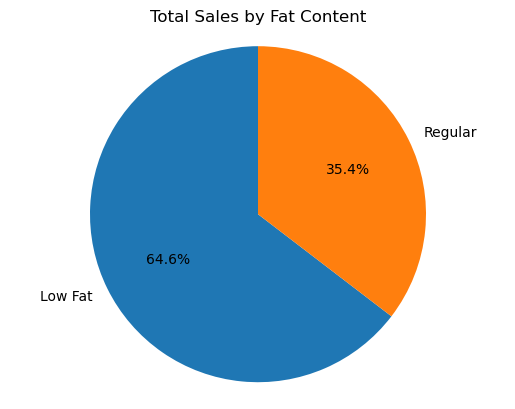

In [27]:
#Charts/Insights:-
#Total sales by fat content:-
sales_by_fat=blinkit.groupby("Item Fat Content")["Sales"].sum()
plt.pie(sales_by_fat,labels=sales_by_fat.index,autopct="%1.1f%%",startangle=90)
plt.title("Total Sales by Fat Content")
plt.axis("equal")
plt.show()

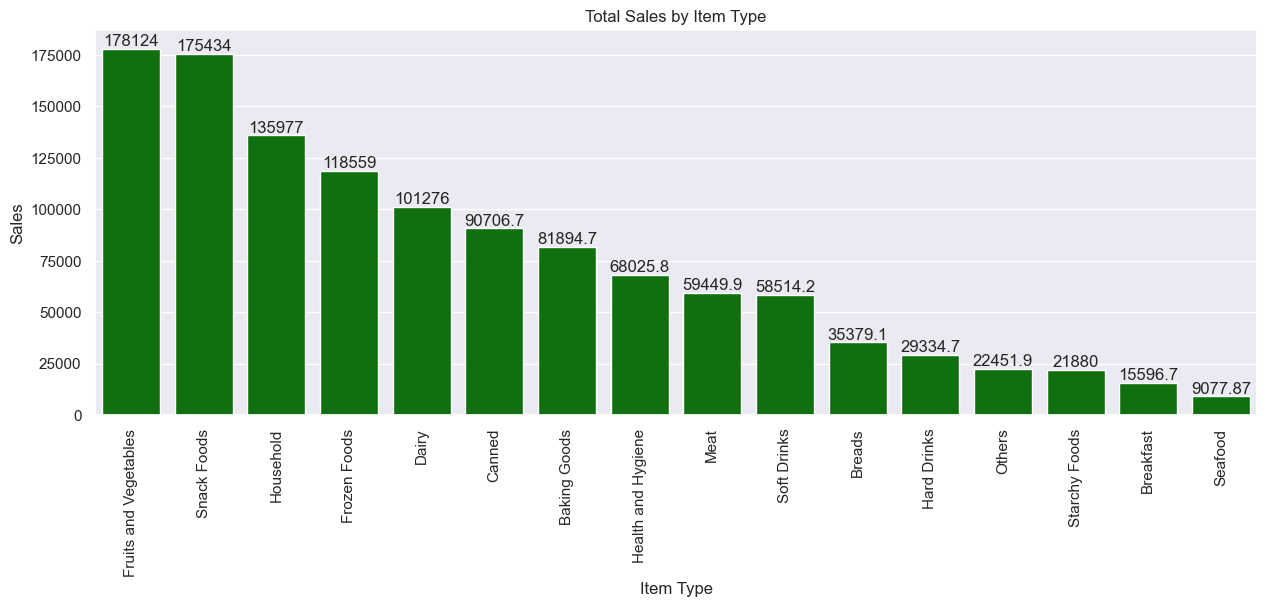

In [9]:
#Total Sales by Item Type:-
sales_by_item=blinkit.groupby(["Item Type"],as_index=False)["Sales"].sum().sort_values(by="Sales",ascending=False)
i=sns.barplot(data=sales_by_item,x="Item Type",y="Sales",color="green")
sns.set(rc={"figure.figsize":(20,5)})
for bars in i.containers:
    i.bar_label(bars)

plt.title("Total Sales by Item Type")
plt.xticks(rotation=90)
sns.set_style("darkgrid")



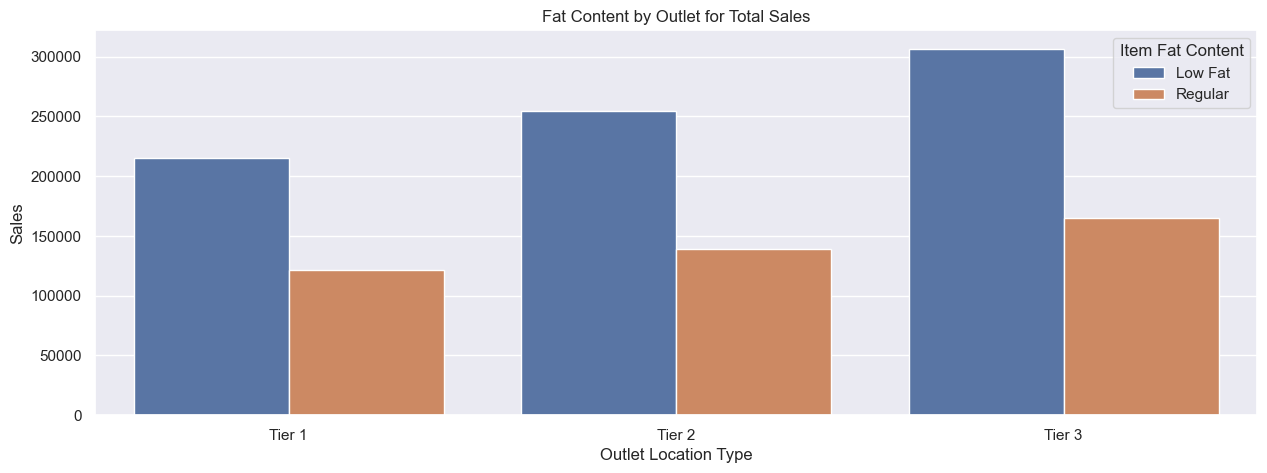

In [30]:
#Fat Content by Outlet for Total Sales:-
sales_by_outlet=blinkit.groupby(["Outlet Location Type","Item Fat Content"],as_index=False)["Sales"].sum()
sns.barplot(data=sales_by_outlet,x="Outlet Location Type",y="Sales",hue="Item Fat Content")
plt.title("Fat Content by Outlet for Total Sales")
sns.set(rc={"figure.figsize":(9,5)})

Text(0.5, 1.0, 'Total Sales by Outlet Establishment')

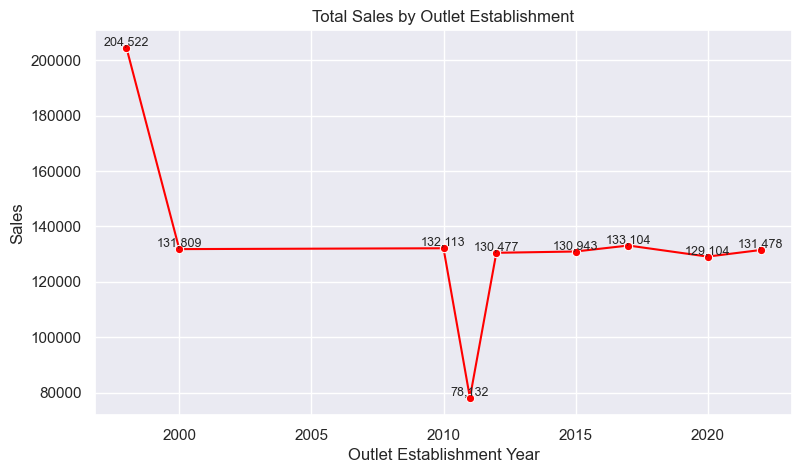

In [31]:
#Total Sales by Outlet Establishment:-
sales_by_establish=blinkit.groupby(["Outlet Establishment Year"],as_index=False)["Sales"].sum()
e=sns.lineplot(data=sales_by_establish,x="Outlet Establishment Year",y="Sales",marker="o",color="red")
for x, y in zip(sales_by_establish["Outlet Establishment Year"], sales_by_establish["Sales"]):
    plt.text(x, y, f"{y:,.0f}", ha="center", va="bottom", fontsize=9)
sns.set(rc={"figure.figsize":(12,5)})
plt.title("Total Sales by Outlet Establishment")

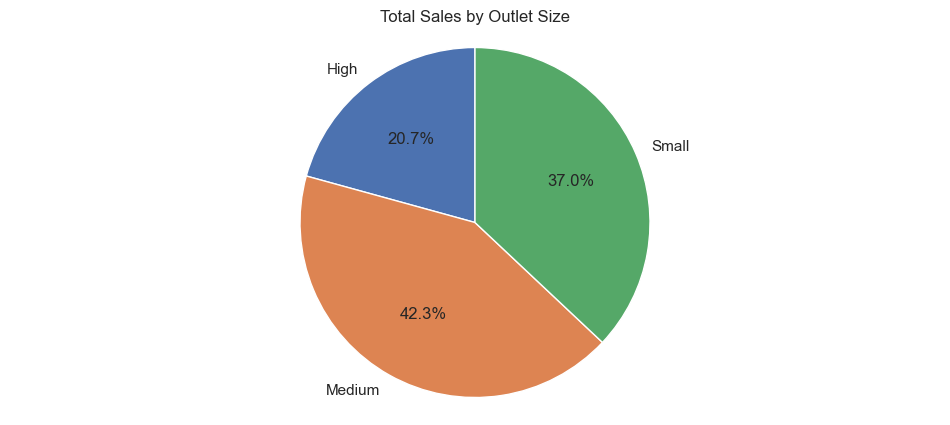

In [32]:
#Sales by Outlet Size:-
sales_by_size=blinkit.groupby("Outlet Size")["Sales"].sum()
plt.pie(sales_by_size,labels=sales_by_size.index,autopct="%1.1f%%",startangle=90)
plt.title("Total Sales by Outlet Size")
plt.axis("equal")
plt.show()

Text(0.5, 1.0, 'Total Sales by Outlet Location Type')

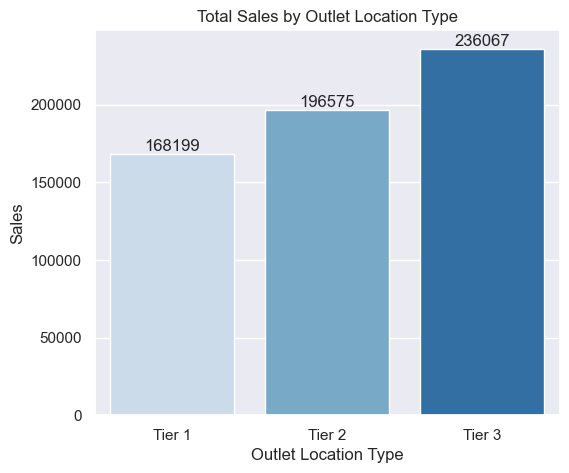

In [46]:
#Sales by Outlet Location Type:-
sales_by_outlett=blinkit.groupby(["Outlet Location Type"],as_index=False)["Sales"].sum().sort_values(by="Outlet Location Type",ascending=False)
t=sns.barplot(data=sales_by_outlet,x="Outlet Location Type",y="Sales",hue="Outlet Location Type",palette="Blues",errorbar=None)
for bars in t.containers:
    t.bar_label(bars)
sns.set(rc={"figure.figsize":(6,5)})
plt.title("Total Sales by Outlet Location Type")

Conclusion:-Supermarket Type 3 outlets perform the best in terms of sales.  
Higher Item Sales tends to correlate with higher sales, showing consumer preference for premium products.  
Smaller outlets with limited visibility face challenges in achieving higher sales.  
Certain product categories (like fruits & vegetables, snack foods) dominate demand.